# Degrees of separation between Wikipedia articles.

The following looks at datasets of link paths between wikipedia articles. Theese are as following:

* **random500**: 500 random start nodes generated from WikiMedia API. All end on 'homunculus'.
* **top50**: 50 start nodes from wikipedias listing of their top most visited pages at the time of writing this. All end on 'homunculus'.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from wikigraph import WikiGraph

# load dataset.
random500 = pd.read_csv("data/random500.csv").set_index("start")
top50 = pd.read_csv("data/top50.csv").set_index("start")

### Mean path length for each data set?

In [2]:
print('''mean:
    random500 = {:.2f}
    top50     = {:.2f}
'''.format(random500['degree'].mean(), top50['degree'].mean()))

mean:
    random500 = 3.92
    top50     = 3.02



Not supprisingly `top50` has a lower degree of separation.

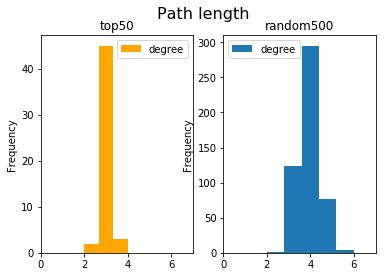

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2)
plt.suptitle('Path length', fontsize=16)
top50.plot.hist(ax=ax1, title="top50", bins=3, xlim=(0, 7), color='orange')
random500.plot.hist(ax=ax2, title="random500", bins=5, xlim=(0, 7))

In [4]:
top50.nsmallest(3, "degree")

,end,path,degree
start,,,
Sex,Homunculus,Sex->Sperm->Homunculus,2
Albert Einstein,Homunculus,Albert Einstein->Edgar Adrian->Homunculus,2
United States,Homunculus,United States->Stroke->Cerebral cortex->Homunc...,3


In [5]:
top50.nlargest(3, "degree")

,end,path,degree
start,,,
Kim Kardashian,Homunculus,Kim Kardashian->Public relations->Critical the...,4
List of Presidents of the United States,Homunculus,List of Presidents of the United States->Donal...,4
Selena Gomez,Homunculus,Selena Gomez->The Fundamentals of Caring->Duch...,4


In [6]:
random500.nsmallest(3, "degree")

,end,path,degree
start,,,
Good luck charm,Homunculus,Good luck charm->Mooncalf->Homunculus,2
Tetrastrum,Homunculus,Tetrastrum->Taxonomy (biology)->History of evo...,3
R Boötis,Homunculus,R Boötis->NGC 5248->Carina Nebula->Homunculus,3


In [7]:
random500.nlargest(3, "degree")

,end,path,degree
start,,,
Honoris Crux,Homunculus,Honoris Crux->Honoris Crux Silver->Captain (ar...,6
1962–63 Bahraini Premier League,Homunculus,1962–63 Bahraini Premier League->2009–10 Bahra...,6
British Pakistani (disambiguation),Homunculus,British Pakistani (disambiguation)->Britons in...,6


### How does the Homunculus compare to other articles in terms of how many links point to it?

In [8]:
wg = WikiGraph()

homunculus  = wg.indegree("homunculus")

rnd_ind = pd.read_csv("data/rand500_indgree.csv", sep="|").set_index("title")
tp_ind  = pd.read_csv("data/top50_indgree.csv").set_index("title")

In [9]:
print('''Indgree:
    homunculus = %.2f
    top50_avg  = %.2f
    rand_avg   = %.2f
''' %(homunculus, tp_ind.mean(), rnd_ind.mean()))

Indgree:
    homunculus = 223.00
    top50_avg  = 47300.40
    rand_avg   = 65.43



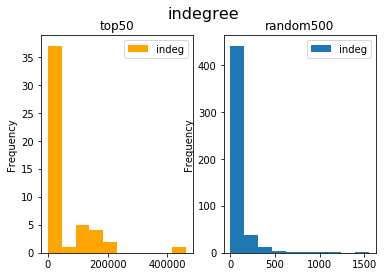

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
plt.suptitle('indegree', fontsize=16)
tp_ind.plot.hist(ax=ax1, title="top50", color='orange')
rnd_ind.plot.hist(ax=ax2, title="random500")

In [11]:
rnd_ind.nlargest(10, 'indeg')

,indeg
title,
'Soviet Union at the 1960 Summer Olympics',1554
'The Lion King',1497
'Drew Barrymore',1097
'Capacitor',1022
'Dyfed–Powys Police',806
'Mike Trout',629
'Pakistan Naval Academy',553
'Girija Devi',518
'Catteville',482


In [12]:
rnd_ind.nsmallest(10, 'indeg')

,indeg
title,
'RSCH',0
'Botham',0
"'Ermita de San Francisco, Nàquera'",0
'An Empty Hug a love story',0
'Kreviazuk',0
'Viveiros',0
'Asahara',0
'Rimikhan Ziyadov',0
'Xenophage',0


so apparently some of the pages generated by the wikipedia random article selector dont actually exist, and therfore have no links pointing to them. What has been generated from links leading away from them must be re-directs. ... what to do about this?

In [13]:
tp_ind.nlargest(10, 'indeg')

,indeg
title,
United States,462672
France,219355
United Kingdom,205651
Germany,185005
Canada,167638
India,166727
Australia,150745
Japan,138017
World War II,130265


In [14]:
tp_ind.nsmallest(10, 'indeg')

,indeg
title,
Kim Kardashian,623
Mark Zuckerberg,708
Sex,1138
Selena Gomez,1200
The Big Bang Theory,1316
The Walking Dead (TV series),1336
Steve Jobs,1343
Breaking Bad,1366
How I Met Your Mother,1379
